In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Import Data
INSURANCE = pd.read_csv('insurance.csv')
df = INSURANCE.copy()
df['sex'].replace(['female','male'], [1,0], inplace = True)
df['smoker'].replace(['yes','no'], [1,0], inplace = True)
df['region'].replace(['southwest','southeast','northwest','northeast'], [0,1,2,3], inplace = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [3]:
# Check For Missing Values
all_cols = df.columns
for col in all_cols:
    print(col, ' - ', df[col].isnull().values.any())

age  -  False
sex  -  False
bmi  -  False
children  -  False
smoker  -  False
region  -  False
charges  -  False


In [4]:
# Train-Test Split
X = df.drop(columns='charges')
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.3, random_state=42)

In [5]:
# Linear Model Fitting
lr = LinearRegression()
lr.fit(X_train, y_train)
    
# Coefficients
b0 = lr.intercept_
b1 = lr.coef_
print('Regresscion Coefficients: ', b1, 'Intercept: ', b0)

Regresscion Coefficients:  [  261.62568984  -109.64719595   344.54483066   424.37016596
 23620.80252148   326.46262527] Intercept:  -13234.132002145212


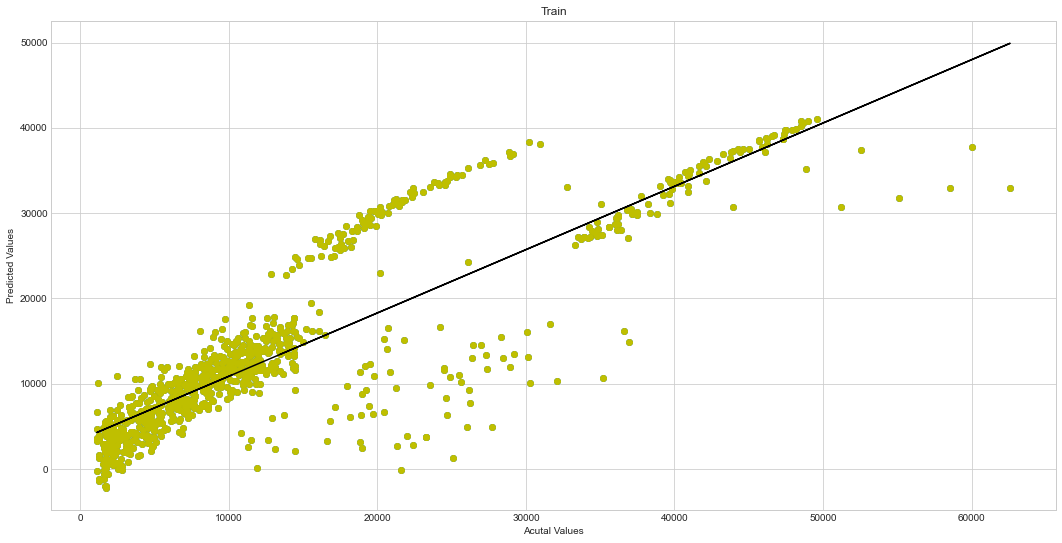

In [6]:
# Prediction
y_pred_train = lr.predict(X_train)

# Visualization
plt.figure(figsize=(18,9))
plt.scatter(y_train, y_pred_train)
b1, b0 = np.polyfit(y_train, y_pred_train, 1)
plt.plot(y_train, y_pred_train, 'yo', y_train, b1 * y_train + b0, 'k')
plt.title('Train')
plt.xlabel('Acutal Values')
plt.ylabel('Predicted Values')
plt.show()

In [7]:
# Compatibility
r2_score(y_train, y_pred_train)

0.74225713201721

In [8]:
# Actual-Predict Compare
bias_train = pd.DataFrame({'Predict': y_pred_train, 'Actual': y_train, 'Bias': abs(y_pred_train - y_train)})
bias_train.head()

,Predict,Actual,Bias
332,14004.330056,13429.03540,575.294656
355,8310.087057,24603.04837,16292.961313
138,13374.561274,27322.73386,13948.172586
381,36327.829465,42303.69215,5975.862685
292,33793.087311,42112.23560,8319.148289


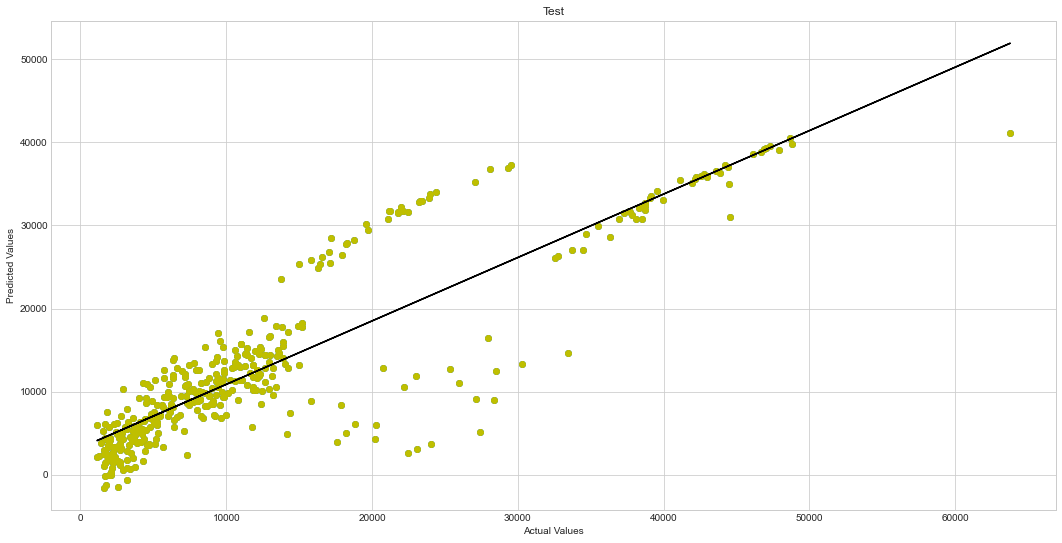

In [9]:
# Prediction
y_pred_test = lr.predict(X_test)

# Visualization
plt.figure(figsize=(18,9))
plt.scatter(y_test, y_pred_test)
b1, b0 = np.polyfit(y_test, y_pred_test, 1)
plt.plot(y_test, y_pred_test, 'yo', y_test, b1 * y_test + b0, 'k')
plt.title('Test')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [10]:
# Compatibility
r2_score(y_test, y_pred_test)

0.7694415927057693

In [11]:
# Actual-Predict Compare
bias_test = pd.DataFrame({'Predict': y_pred_test, 'Actual': y_test, 'Bias': abs(y_pred_test - y_test)})
bias_test.head()

,Predict,Actual,Bias
764,8931.421164,9095.06825,163.647086
887,7070.906703,5272.17580,1798.730903
890,36937.080496,29330.98315,7606.097346
1293,9596.992144,9301.89355,295.098594
259,27008.354871,33750.29180,6741.936929
